# Análisis de filtro PASA BAJOS con RC

El circuito tiene las siguientes características:

```
 _____ -V0 (SIN)+ _______ R ________ C ____   
|                     |          |         |  
GND                  Vin         Vout      GND
```

Parámetros:
- R = 80 $k \Omega$
- C = 1 $n F$

- Frecuencia de corte $f_c= \frac{1}{2 \pi R C} \approx 2$ kHz
- $V_0$ sinusoidal, amplitud $5V$. Barrido en frecuencia  $f \in (10, 10000)$ Hz 
- En $V_{in}$ se mide la amplitud de la señal de entrada (CRMS) respecto de GND (masa) (Res. int. gen. $r_G=50 \Omega$).
- En $V_{out}$ se mide la amplitud de la señal de salida (CRMS) en el capacitor respecto de GND (masa).

Empezamos importando las librerías necesarias:

In [88]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

Cargamos los datos,

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   f       100 non-null    float64
 1   T       100 non-null    float64
dtypes: float64(2)
memory usage: 1.7 KB
None


<Axes: xlabel='f', ylabel='T'>

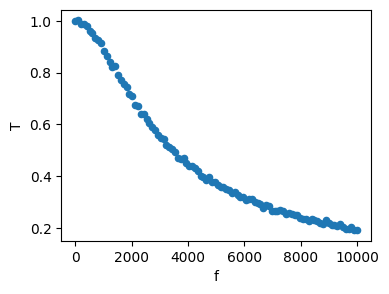

In [89]:
arx = 'datos/RC_PB.csv'
df = pd.read_csv(arx)

print (df.info())

df.plot.scatter(x='f',y='T', figsize=(4,3))

Cambiamos la unidad del eje x para optimizar el ajuste,

In [90]:
U = 1e4
f = df["f"].to_numpy()/U
T = df["T"].to_numpy()


La frecuencia de corte teórica nos sirve como referencia para fijar la semilla,

In [91]:
R= 80e3 
C= 1e-9

fc_th = ( 1.0/(2*np.pi*R*C) )/U 

print( f"Frec corte teórica: {fc_th:.6f} [UHz]")


Frec corte teórica: 0.198944 [UHz]


Defino el modelo para la función de transferencia como,

$$
T = \frac{|V_{out}|}{|V_{in}|} = \frac{ 1 }{ \sqrt{1 + (\frac{f}{f_c})^2} }.
$$

Hago el ajuste,

In [92]:
def modelo_T( f, fc ):
    x = 1.0*f/fc
    T = 1.0/np.sqrt( 1.0 + x**2 )
    return T


# Semilla frec corte
fc_ini = 0.1

popt, pcov = curve_fit(modelo_T, f, T, p0=fc_ini )      

fc_exp = popt[0]

# Errores estandar
SE_fc = np.sqrt(np.diag(pcov))[0]

print ("Parámetros obtenidos del ajuste:")
print(f"fc = ({fc_exp:.6f} ± {SE_fc:.6f}) [UHz]")

Parámetros obtenidos del ajuste:
fc = (0.199183 ± 0.000393) [UHz]


Gráfico de lo obtenido,

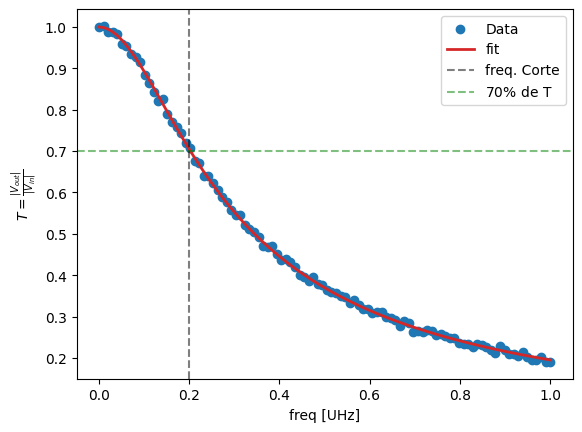

In [93]:
fig,ax = plt.subplots()

ax.scatter( f,T, label='Data' )

ax.plot(f, modelo_T(f,fc_exp), c= 'C3', label='fit', linewidth=2)

ax.axvline( fc_exp, linestyle='--', c='black', alpha=0.5, label='freq. Corte' )

ax.axhline( 0.7, linestyle='--', c='green', alpha=0.5, label=r'$70\%$ de T' )

ax.set_xlabel("freq [UHz]")
ax.set_ylabel(r"$T = \frac{|V_{out}|}{|V_{in}|}$")
ax.legend()
plt.show()


Vemos que la frecuencia de corte se corresponde con el valor donde la amplitud de salida es el $70 \%$ de la amplitud de entrada.

### Gráfico de la atenuación

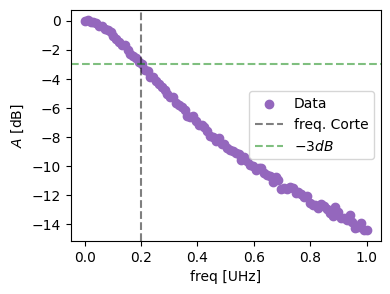

In [94]:
A = 20*np.log10(T)


fig,ax = plt.subplots(figsize=(4,3))

ax.scatter( f,A, label='Data', c='C4' )

ax.axvline( fc_exp, linestyle='--', c='black', alpha=0.5, label='freq. Corte' )

ax.axhline( -3, linestyle='--', c='green', alpha=0.5, label=r'$-3dB$' )


ax.set_xlabel("freq [UHz]")
ax.set_ylabel(r"$A$ [dB]")
ax.legend()
plt.show()

---

## Pasa bajos con circuito RL

Describo en el siguiente apartado un caso patológico de filtro PARA BAJOS con circuito RL: **cuando la resistencia  utilizada es del orden de la resistencia interna del inductor**:

```
 _____ -V0 (SIN)+ _______ L _ rL ________ R ____   
|                     |               |         |  
GND                  Vin             Vout      GND
```

Parámetros:
- R = 125 $\Omega$
- L = 10 $mH$ (Res. int. inductancia $r_L \approx 100 \Omega$)

- Frecuencia de corte $f_c= \frac{1}{2 \pi \frac{L}{R}} \approx 2$ kHz
- $V_0$ sinusoidal, amplitud $5V$. Barrido en frecuencia  $f \in (10, 10000)$ Hz 
- En $V_{in}$ se mide la amplitud de la señal de entrada (CRMS) respecto de GND (masa) (Res. int. gen. $r_G=50 \Omega$).
- En $V_{out}$ se mide la amplitud de la señal de salida (CRMS) en el capacitor respecto de GND (masa).


Veremos que en este caso, la resistencia interna $r_L$ afectará a la función de transferencia.

Empezamos cargando los datos del experimento,

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   f       100 non-null    float64
 1   T       100 non-null    float64
dtypes: float64(2)
memory usage: 1.7 KB
None


<Axes: xlabel='f', ylabel='T'>

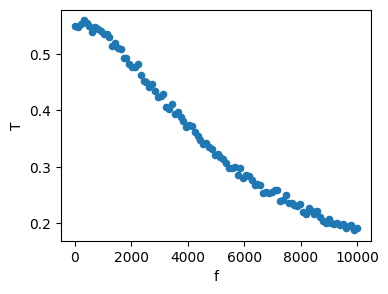

In [95]:
arx = 'datos/RL_PB.csv'
df = pd.read_csv(arx)

print (df.info())

df.plot.scatter(x='f',y='T', figsize=(4,3))

Vemos que para valores por debajo de $f_c$, la función de transferencia NO tiende a 1. Esto significa que la caída de potencial en la resistencia interna del inductor no es nada despreciable. La tensión $V_{out}$ podemos expresarla como una fracción de $V_{in}$ de la siguiente manera,
$$
V_{out} = V_{in} \frac{Z_R}{ Z_R + Z_{r_L} + Z_L }
$$

luego, la función de transferencia es,
$$
T = \frac{V_{out}}{V_{in}} = \frac{1}{ 1+ \frac{Z_{r_L}}{Z_R}+ \frac{Z_L}{Z_R} } = \frac{1}{ 1+ \frac{r_L}{R}+ \frac{j 2\pi f L}{R} }
$$

Tomando módulo y definiendo la frecuencia de corte como $f_c = \frac{R}{2 \pi L}$, tenemos,
$$
|T| = \frac{1}{ \sqrt{ (1+ \frac{r_L}{R})^2 + (\frac{f}{f_c})^2 } }
$$

Vemos que si $R \gg r_L$ entonces recuperamos la expresión de la función de transferencia que utilizamos en filtro con el circuito RC. Lamentablemente ese no es nuetro caso, por lo cual tenemos que modificar el modelo propuesto en la sección anterior,

In [96]:
def modelo_T_rL( f, fc, rL ):

    R = 125
    a = (1+rL/R)
    x = f/fc

    T = 1.0/np.sqrt( a**2 + x**2 )
    return T


# variables nuevas
U = 1e4
f1 = df["f"].to_numpy()/U
T1 = df["T"].to_numpy()


# Semilla frec corte
fc_ini = 0.1
rL_ini = 100
p0 = [fc_ini, rL_ini] 

popt, pcov = curve_fit(modelo_T_rL, f1, T1, p0=p0)      

fc_exp, rL_exp = popt

# Errores estandar
SE_fc, SE_rL = np.sqrt(np.diag(pcov))

print ("Parámetros obtenidos del ajuste:")
print(f"fc = ({fc_exp:.6f} ± {SE_fc:.6f}) [UHz]")
print(f"rL = ({rL_exp:.6f} ± {SE_rL:.6f}) [Ohm]")

Parámetros obtenidos del ajuste:
fc = (0.199633 ± 0.000660) [UHz]
rL = (100.451962 ± 0.501174) [Ohm]


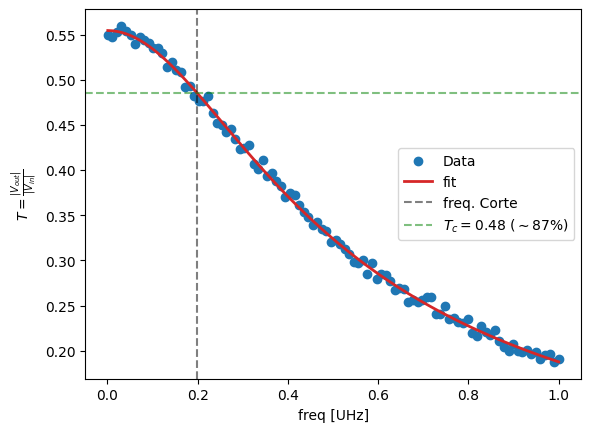

In [103]:
fig,ax = plt.subplots()

ax.scatter( f1,T1, label='Data' )

ax.plot(f, modelo_T_rL(f,*popt), c= 'C3', label='fit', linewidth=2)

ax.axvline( fc_exp, linestyle='--', c='black', alpha=0.5, label='freq. Corte' )


# calculo el valor de la transferencia a la frecuencia de corte
Tc = modelo_T_rL(fc_exp,*popt)
ax.axhline( Tc, linestyle='--', c='green', alpha=0.5, label=f'$T_c = {Tc:.2f}$ ($\sim 87\%$)' )

ax.set_xlabel("freq [UHz]")
ax.set_ylabel(r"$T = \frac{|V_{out}|}{|V_{in}|}$")
ax.legend()
plt.show()